In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load Dataset - in train test split form
(X_train, y_train), (X_test, y_test) =  keras.datasets.mnist.load_data()

### Understand Dataset

In [4]:
#Number of train examples
len(X_train)

60000

In [5]:
#Number of test examples
len(X_test)

10000

In [6]:
# Shape of Test data
X_train.shape
#(60000, 28, 28) = 60000 examples of [28.28]

(60000, 28, 28)

In [7]:
# Shape of 1 Test data element
X_train[0].shape

(28, 28)

In [8]:
# Print first train data elelment
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train.shape

(60000,)

In [10]:
#Print first y train element
y_train[0]

5

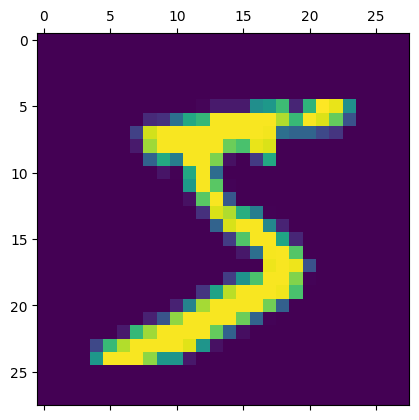

In [11]:
# plt.matshow() displays the matrix (like an image).
plt.matshow(X_train[0])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

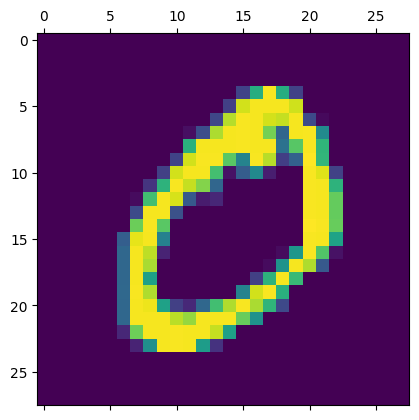

In [12]:
plt.matshow(X_train[1])
plt.show

In [13]:
# Check y value for above x
y_train[1]

0

In [14]:
# Print first 5 y train values
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### Data Preprocessing

In [15]:
#Flatten X_trian from (60000, 28, 28 ) to (60000, 784)
    #Most neural networks (like Sequential models with Dense layers) expect the input as a 1D vector rather than a 2D matrix. 
    #So you reshape it.

X_train_flatened = X_train.reshape(len(X_train), 28*28)
X_test_flatened = X_test.reshape(len(X_test), 28*28)
#Also can use: X_train_flatened = X_train.reshape(-1, 28 * 28) --> -1 lets NumPy automatically figure out how many samples there are — it's a placeholder for "whatever fits."

X_train_flatened.shape

(60000, 784)

In [16]:
X_train_flatened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Model Training

In [17]:
#Basic Architecture (Exclusing normalization here, so as to understand its impact)

model = tf.keras.Sequential([
tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # input must be flattened
tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
    
model.fit(X_train_flatened, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5767 - accuracy: 0.8607
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3558 - accuracy: 0.9141
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2720 - accuracy: 0.9313
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9373
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2255 - accuracy: 0.9417
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2165 - accuracy: 0.9462
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1961 - accuracy: 0.9495
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1954 - accuracy: 0.9524
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1822 - accuracy: 0.9562
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.180

In [18]:
# Model Testing
test_loss, test_acc = model.evaluate(X_test_flatened, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9516


In [19]:
# Scaling is always recommended --> faster convergence, better performance, stability
# Scaling X values to (0,1) is usually suited for ReLU

X_train_scaled = X_train_flatened.astype("float32") / 255
X_test_scaled = X_test_flatened.astype("float32") / 255

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # input must be flattened
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
    
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy with Scaled data: {test_acc:.4f}")


Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9215 - val_loss: 0.1416 - val_accuracy: 0.9587
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1204 - accuracy: 0.9640 - val_loss: 0.1021 - val_accuracy: 0.9703
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0823 - accuracy: 0.9750 - val_loss: 0.0816 - val_accuracy: 0.9782
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0609 - accuracy: 0.9808 - val_loss: 0.0860 - val_accuracy: 0.9752
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0773 - val_accuracy: 0.9785
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0768 - val_accuracy: 0.9787
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0793 - val_accuracy:

##### Inference: This demonstrates how important scaling is --> 0.95 to 0.97

### Model Optimization

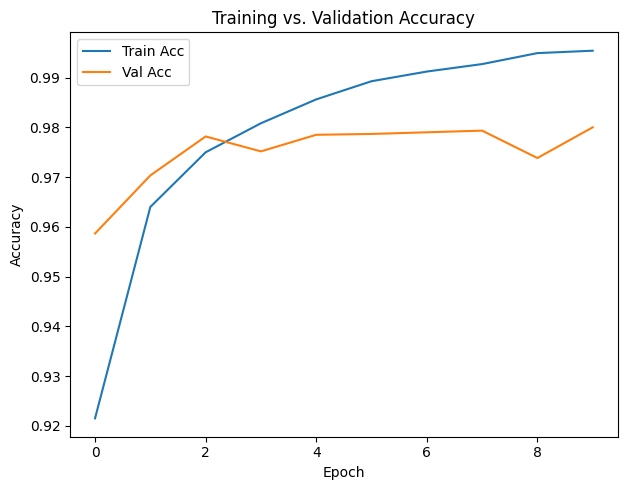

In [21]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Inference: 
- Early epochs(0-2): both trainig and validation accuracy increases --> Model Learning meaningful patterns from data
- Mid Epoch(3-5): Training accuracy continues to rise ~99%, Validation accuracy flattens around 97.8% -->  Model is no longer generalizing.
- Later Epoch(6-9): Training accuracy keeps increasing, Validation accuracy stagnates. -->  early signs of overfitting.

Training accuracy is already high, so NO need for more complex model (more layers or more nuerons) --> Will only worsen overfitting if complex
There's a Gap between Train and validation accuracy(variance), this can be improved --> Regularisation/Dropout

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0885 - val_accuracy: 0.9785
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0886 - val_accuracy: 0.9798
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.1059 - val_accuracy: 0.9762
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0847 - val_accuracy: 0.9795
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0840 - val_accuracy: 0.9803
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.1145 - val_accuracy: 0.9780
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.1084 - val_accuracy:

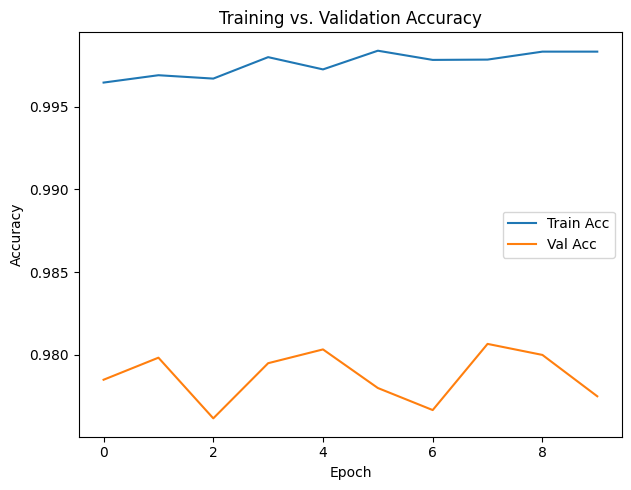

In [22]:
#Dropout --> Reducing Overfitting

# Train with validation data
history = model.fit(X_train_scaled, y_train,
                    epochs=10,
                    validation_split=0.1
                   ) 

test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy with Scaled data: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Observation:
- Training Accuracy: Grows more slowly, stays around 99.7%
- Validation Accuracy: Almost Matches training accuracy (~98.2%)
- Gap (Variance): Almost zero or slightly reversed (val ≈ train)

Inference:
- ✅ Dropout helped in reducing overfitting.
- 🔻 You’ve sacrificed a bit of training accuracy (expected), but now your model generalizes better --> Improved training accuracy
- 📉 The reduced gap and stable validation accuracy → your model is now more robust.


### Prediction

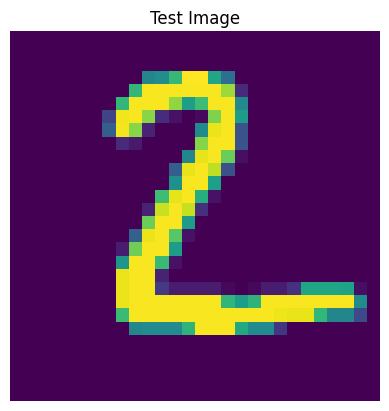

1/1 [==============================] - 0s 82ms/step
Predicted Probablities: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Digit: 2


In [23]:
#Prediction
test_image = X_test[1]

# Plot the image for verification
plt.imshow(test_image.reshape(28, 28))
plt.title("Test Image")
plt.axis('off')
plt.show()

# Reshape to match model input: (1, 784)
test_image_reshaped = test_image.reshape(1, 784)

# Predict
pred_probs = model.predict(test_image_reshaped)
predicted_class = np.argmax(pred_probs)

print(f"Predicted Probablities: {pred_probs}")
print(f"Predicted Digit: {predicted_class}")

### Real Time Prediction

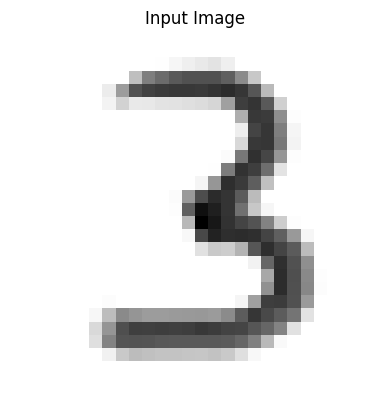

1/1 [==============================] - 0s 45ms/step
Predicted Digit: 3
Class Probabilities:
0: 0.0000
1: 0.0000
2: 0.0000
3: 1.0000
4: 0.0000
5: 0.0000
6: 0.0000
7: 0.0000
8: 0.0000
9: 0.0000


In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess image
def load_image(filepath):
    # Load and convert to grayscale
    img = Image.open(filepath).convert('L')  # 'L' = grayscale
    img = img.resize((28, 28))               # Resize to MNIST format
    img_np = np.array(img)

    # Invert colors if needed (MNIST digits are white on black)
    img_np = 255 - img_np

    # Normalize and reshape
    img_np = img_np.astype("float32") / 255.0
    img_np = img_np.reshape(1, 784)  # same as (1, 28*28)

    return img_np, img

# Step 2: Predict using trained model
def predict_digit(filepath):
    preprocessed_img, raw_img = load_image(filepath)

    # Show image
    plt.imshow(raw_img, cmap='gray')
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Predict
    pred_probs = model.predict(preprocessed_img)
    pred_class = np.argmax(pred_probs)

    # Output
    print(f"Predicted Digit: {pred_class}")
    print("Class Probabilities:")
    for i, prob in enumerate(pred_probs[0]):
        print(f"{i}: {prob:.4f}")

# 🔁 Example usage
predict_digit("C:\\Users\\pushk\\OneDrive\\Desktop\\three.png")  


### Export Model

In [25]:
model.save("model\digit_recognition_model.h5")

C:\Users\pushk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
